2.1 Obtain Time Series Data

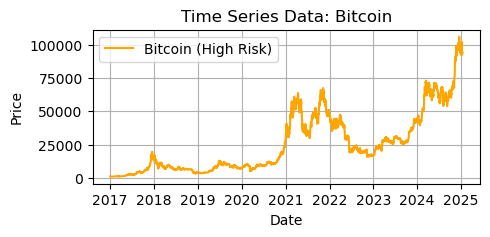

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

# Initialize FRED API with valid API key
fred = Fred(api_key='810a79f9b8a1e0e9a1ce2fd65f92d474')

# obtain high-risk asset data (Bitcoin Price Index)
crypto_data = fred.get_series('CBBTCUSD', observation_start='2017-01-01')
# Plot the data
plt.figure(figsize=(5, 2))
plt.plot(crypto_data, label='Bitcoin (High Risk)', color='orange')
plt.title('Time Series Data: Bitcoin')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()



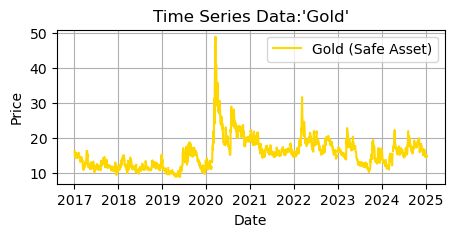

In [22]:
# Obtain safe asset data (Gold Price: PM Fixing)
gold_data = fred.get_series('GVZCLS', observation_start='2017-01-01')
plt.figure(figsize=(5, 2))
plt.plot(gold_data, label='Gold (Safe Asset)', color='gold')
plt.title("Time Series Data:'Gold'")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


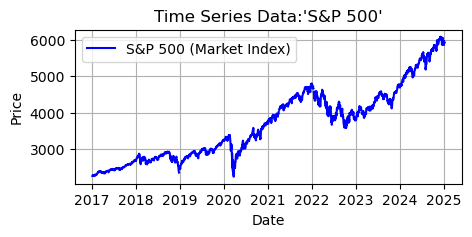

In [23]:

# Obtain stock market index data (S&P 500)
sp500_data = fred.get_series('SP500', observation_start='2017-01-01')
plt.figure(figsize=(5, 2))
plt.plot(sp500_data, label='S&P 500 (Market Index)', color='blue')
plt.title("Time Series Data:'S&P 500'")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

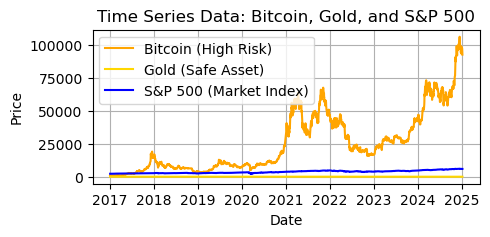

In [24]:
# Combine the data into a single DataFrame
combined_data = pd.DataFrame({
    'Bitcoin (High Risk)': crypto_data,
    'Gold (Safe Asset)': gold_data,
    'S&P 500 (Market Index)': sp500_data
})

# Drop rows with missing values
combined_data.dropna(inplace=True)

# Plot the data
plt.figure(figsize=(5, 2))
plt.plot(combined_data.index, combined_data['Bitcoin (High Risk)'], label='Bitcoin (High Risk)', color='orange')
plt.plot(combined_data.index, combined_data['Gold (Safe Asset)'], label='Gold (Safe Asset)', color='gold')
plt.plot(combined_data.index, combined_data['S&P 500 (Market Index)'], label='S&P 500 (Market Index)', color='blue')
plt.title('Time Series Data: Bitcoin, Gold, and S&P 500')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

2.2  Data Transformations

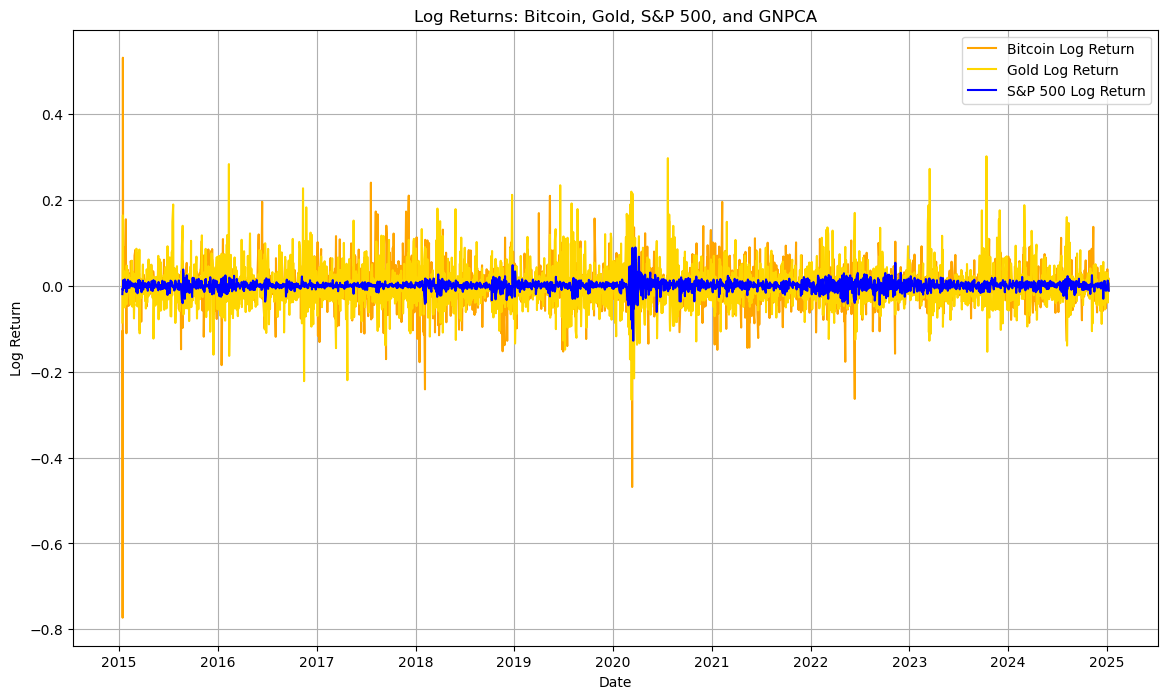

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fredapi import Fred

# Initialize FRED API with valid API key

fred_api_key = '810a79f9b8a1e0e9a1ce2fd65f92d474' 
fred = Fred(api_key=fred_api_key)

# Fetch data for the longest available time period
 # Bitcoin price index
crypto_data = fred.get_series('CBBTCUSD')  
# Gold Price fixing
gold_data = fred.get_series('GVZCLS') 
# S&P 500 index 
sp500_data = fred.get_series('SP500')  

# Combine data into a single DataFrame
combined_data = pd.DataFrame({
    'Bitcoin (High Risk)': crypto_data,
    'Gold (Safe Asset)': gold_data,
    'S&P 500 (Market Index)': sp500_data,
})

# Drop rows with missing values
combined_data.dropna(inplace=True)

# Calculate log returns
log_returns = combined_data.apply(lambda x: np.log(x) - np.log(x.shift(1)))

# Rename columns for clarity
log_returns.columns = [
    'Bitcoin Log Return',
    'Gold Log Return',
    'S&P 500 Log Return',
]

# Drop missing values caused by the shift operation
log_returns.dropna(inplace=True)

# Plot the log returns
plt.figure(figsize=(14, 8))
plt.plot(log_returns.index, log_returns['Bitcoin Log Return'], label='Bitcoin Log Return', color='orange')
plt.plot(log_returns.index, log_returns['Gold Log Return'], label='Gold Log Return', color='gold')
plt.plot(log_returns.index, log_returns['S&P 500 Log Return'], label='S&P 500 Log Return', color='blue')
plt.title('Log Returns: Bitcoin, Gold, S&P 500')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.grid()
plt.show()


2.3  Data Analysis

In [18]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from fredapi import Fred

# Initialize FRED API with valid API key
fred_api_key = '810a79f9b8a1e0e9a1ce2fd65f92d474'  
fred = Fred(api_key=fred_api_key)

# Obtain data for Bitcoin, Gold, S&P 500, and Risk-Free Rate
crypto_data = fred.get_series('CBBTCUSD')
gold_data = fred.get_series('GVZCLS')
sp500_data = fred.get_series('SP500')
risk_free_rate = fred.get_series('DGS10') 

# Combine data into a single DataFrame
combined_data = pd.DataFrame({
    'Bitcoin (High Risk)': crypto_data,
    'Gold (Safe Asset)': gold_data,
    'S&P 500 (Market Index)': sp500_data,
    'Risk-Free Rate': risk_free_rate
})

# Drop rows with missing values
combined_data.dropna(inplace=True)

# Calculate log returns
log_returns = combined_data[['Bitcoin (High Risk)', 'Gold (Safe Asset)', 'S&P 500 (Market Index)']].apply(
    lambda x: np.log(x) - np.log(x.shift(1))
)
log_returns.dropna(inplace=True)

# Include Risk-Free Rate in returns
log_returns['Risk-Free Rate'] = combined_data['Risk-Free Rate'].iloc[1:]  

# Calculate excess returns
log_returns['Excess Bitcoin Return'] = log_returns['Bitcoin (High Risk)'] - log_returns['Risk-Free Rate']
log_returns['Excess Market Return'] = log_returns['S&P 500 (Market Index)'] - log_returns['Risk-Free Rate']

# Correlation Analysis
correlation_matrix = log_returns.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# CAPM Regression (OLS)
# y = Excess Bitcoin Return; x = Excess Market Return
y = log_returns['Excess Bitcoin Return']
X = log_returns['Excess Market Return']
X = sm.add_constant(X) 

# Perform OLS Regression
model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())

# Extract alpha and beta
alpha = model.params['const']
beta = model.params['Excess Market Return']

# Interpretation
print(f"Alpha (Intercept): {round(alpha,4)}")
print(f"Beta (Slope): {beta}")




Correlation Matrix:
                        Bitcoin (High Risk)  Gold (Safe Asset)  \
Bitcoin (High Risk)                1.000000           0.000402   
Gold (Safe Asset)                  0.000402           1.000000   
S&P 500 (Market Index)             0.203198          -0.334871   
Risk-Free Rate                    -0.018965          -0.008853   
Excess Bitcoin Return              0.063612           0.008855   
Excess Market Return               0.021136           0.005271   

                        S&P 500 (Market Index)  Risk-Free Rate  \
Bitcoin (High Risk)                   0.203198       -0.018965   
Gold (Safe Asset)                    -0.334871       -0.008853   
S&P 500 (Market Index)                1.000000       -0.003502   
Risk-Free Rate                       -0.003502        1.000000   
Excess Bitcoin Return                 0.012575       -0.999002   
Excess Market Return                  0.014197       -0.999943   

                        Excess Bitcoin Return  Excess 